In [1]:
import ROOT
from ROOT import *

import os

Welcome to JupyROOT 6.26/04


In [2]:
filelist=os.listdir('./')

myFiles=[files for files in filelist if '_v1_' in files]
sorted_myFiles = sorted(myFiles)
sorted_myFiles

['VLL2016preVFP_bTagEff_May18_v1_DYJetsToLL_M10To50_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_DYJetsToLL_M50_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_HTbinnedWJets_100to200_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_HTbinnedWJets_200to400_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_HTbinnedWJets_400to600_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_HTbinnedWJets_600to800_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_HTbinnedWJets_70to100_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_HTbinnedWJets_800to1200_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_HTbinnedWJets_Inclusive_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_QCD_MuEnriched_120to170_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_QCD_MuEnriched_15to20_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_QCD_MuEnriched_170to300_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_QCD_MuEnriched_20to30_sample.root',
 'VLL2016preVFP_bTagEff_May18_v1_QCD_MuEnriched_300to470_sample.root',
 'VLL2016preVFP_bTagEff_May18_

In [3]:
myFiles[0].split('_sample')[0].split('_v1_')[1]


'VLL_M125'

In [4]:
def printbEff(fname,cName):
    
    #Read
    file=TFile.Open(fname,'READ')
    
    #Read Histo
    den = 'LightJet_PtEta'
    num = 'LightJet_Mis_PtEta'
    
    num_histo= file.Get(num)
    den_histo= file.Get(den)

    eff_histo=num_histo.Clone()
    eff_histo.Divide(den_histo)
    
    
    titlelabel=fname.split('_sample')[0].split('_v1_')[1]
    canvas=TCanvas(cName,"",800,600)
    gStyle.SetOptStat(0)
    eff_histo.GetZaxis().SetRangeUser(0.0,1.0)
    canvas.SetLogx(1)
    eff_histo.Draw('colz text same')
    eff_histo.SetTitle('LightJetMisEff_'+titlelabel)
    canvas.Draw()
    #canvas.SaveAs(f'LightJetMisEff_{titlelabel}.pdf')
    
    
    
    ##printarray
    
    print('For the sample '+ titlelabel+'\n')
    bjeteffarray=[]
    for i in range(1,4):
        foreacheta=[]
        for j in range(2,10):
            #print(f'{i}{j}')
            value= eff_histo.GetBinContent(j,i)
            foreacheta.append(value)
        bjeteffarray.append(foreacheta)
    bjeteffarray

    return canvas,bjeteffarray

In [5]:
#sortlabel=['VLL_M','HTbinnedWJets']
sortlabel=['DYJetsToLL','QCD_MuEnriched','ZZ','WZ','WW','SingleTop','TTBar','HTbinnedWJets','VLL_M']

For the sample DYJetsToLL_M50

{{0.023866666480898857, 0.013273044489324093, 0.009734435006976128, 0.008721626363694668, 0.0090299928560853, 0.012005571275949478, 0.027285020798444748, 0.08650518953800201}, {0.028131645172834396, 0.015391024760901928, 0.012612964026629925, 0.012775879353284836, 0.015810277312994003, 0.024105655029416084, 0.050740815699100494, 0.15201465785503387}, {0.03201977536082268, 0.01797243393957615, 0.016064858064055443, 0.01685221493244171, 0.021357959136366844, 0.03566566854715347, 0.06362815946340561, 0.0796460211277008}}




For the sample DYJetsToLL_M10To50

{{0.016857285052537918, 0.007736803963780403, 0.007419278379529715, 0.007612281013280153, 0.0066971080377697945, 0.006344171240925789, 0.021479712799191475, 0.0}, {0.020081860944628716, 0.010070573538541794, 0.009381718933582306, 0.010719530284404755, 0.010402219370007515, 0.025193799287080765, 0.044025156646966934, 0.30000001192092896}, {0.02573653869330883, 0.01442484837025404, 0.015307971276342869, 0

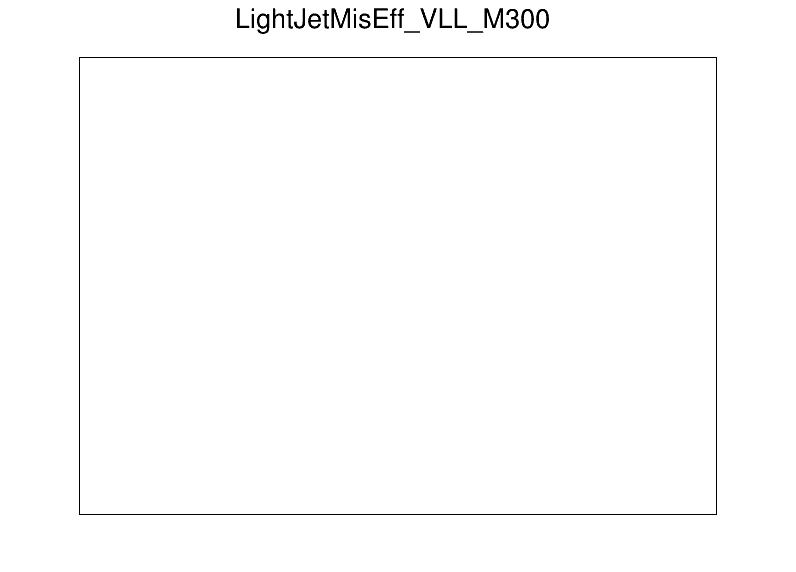

In [6]:
for bkg in sortlabel:
    for index, fname_ in enumerate(myFiles):
        if(bkg in fname_):
            canvas,effarray = printbEff(fname_,'can'+str(index))
            carray=str(effarray).replace('[','{').replace(']','}')
            print(carray)
            print('\n\n\n')